## Financial Data Analysis


#### IMPORTING IMPORTANT LIBRARIES


In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import talib as ta

In [2]:
import sys
import os


sys.path.append(os.path.abspath("../scripts"))
from utils import *
from financial_analyzer import *

data_utils = DataUtils()

#### IMPORTING historical dataset

In [3]:
AAPL = data_utils.load_historical_data("AAPL")
AMZN = data_utils.load_historical_data("AMZN")
GOOG = data_utils.load_historical_data("GOOG")
META = data_utils.load_historical_data("META")
MSFT = data_utils.load_historical_data("MSFT")
NVDA = data_utils.load_historical_data("NVDA")
TSLA = data_utils.load_historical_data("TSLA")

In [4]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [5]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [6]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [7]:
META.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200
2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600
2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600
2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500
2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900


In [8]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400


In [9]:
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [10]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
technical_indicator = TechnicalIndicator(AAPL)
technical_indicator.lagging_indicators()
technical_indicator.instantaneous_indicators()
technical_indicator.leading_indicators()
technical_indicator.volume_indicators()
technical_indicator.volatility_indicators()
AAPL.dropna(inplace=True)

In [12]:
# The price levels are small for analysis so lets select the recent
# To zoom in to see the effect lets just analyze the past 4 years of data
AAPL_recent = AAPL.loc[AAPL.index.year > 2020]
AAPL_recent.head()

,Open,High,Low,Close,Adj Close,Volume,EMA,WMA,ADXR,RSI,HT_TRENDLINE,TYPPRICE,HT_TRENDMODE,CMO,TSF,MFI,OBV,AD,ATR
Date,,,,,,,,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.683434,143301900,126.414926,128.058237,19.357938,54.931994,128.114074,129.926669,1,9.863988,135.324399,54.913229,1.598273e+11,4.309271e+10,2.755791
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.249725,97664900,126.711382,128.453570,19.331674,57.697283,128.217050,130.393331,1,15.394565,134.060550,55.549847,1.599250e+11,4.314730e+10,2.708164
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.932655,155088000,126.704196,128.537785,19.157320,48.807969,128.208373,128.010000,1,-2.384062,132.304945,46.364229,1.597699e+11,4.300682e+10,2.865807
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.161621,109578200,126.976183,128.880796,19.136050,55.965116,128.208230,130.136668,1,11.930232,131.813515,46.789747,1.598795e+11,4.307513e+10,2.847729
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.267822,105158200,127.303526,129.260000,18.794281,57.633668,128.277233,131.636668,1,15.267335,131.698900,47.199191,1.599846e+11,4.312946e+10,2.751513


#### Plotting price movement and indicators

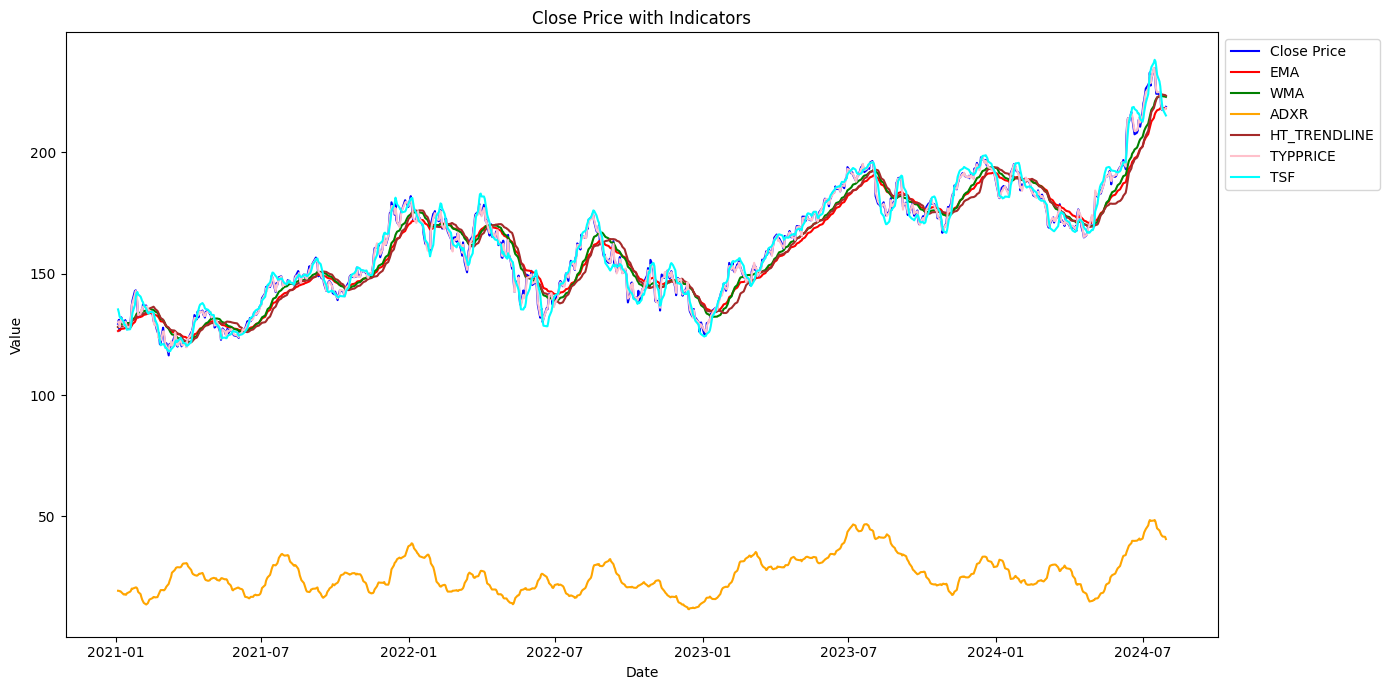

In [13]:
technical_indicator.plot_price_indicators(AAPL_recent)

**Observation**
- TYPPRICE (Typical Price) which is the average of the high, low, and close prices for a period.
- TSF (Time Series Forecast): Uses past price data to forecast future prices.
    * These two indicators are really close to the `Close` price indicating that these indicators provide a snapshot of the market condition at a specific moment, without considering past data. And TSF is a forcator indicotor which means that this indicator will be close to the price.
- EMA and WMA are lagging indicators this can be seen from the graph.
- ADXR (Average Directional Movement Index Rating): An average of the ADX values over a period to smooth out fluctuations and give a clearer picture of trend strength.
    * We can see that on the up trand ADXR have a positive slope showing the relation of the trend stength. And We can also see a decline in ADXR in before the price declines showing that the trend is ending.

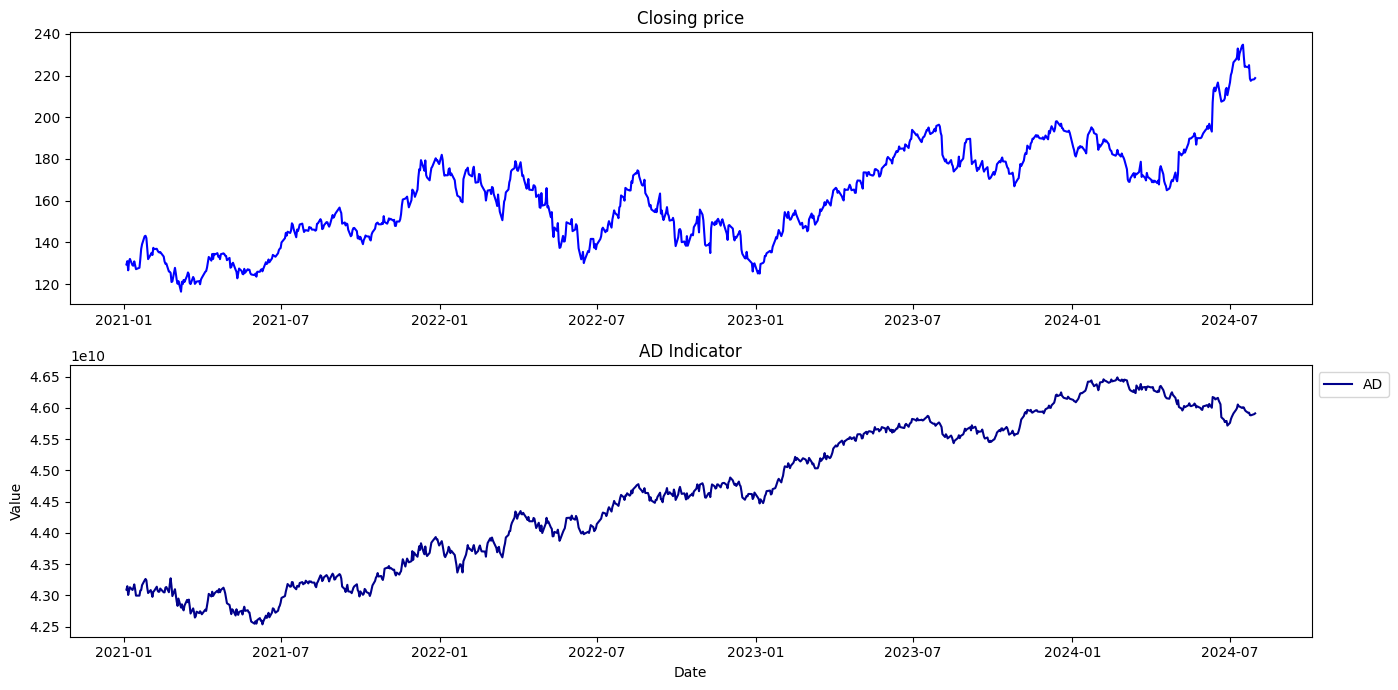

In [14]:
technical_indicator.plot_AD(AAPL_recent)

**Observation**
- Accumulation/Distribution Line (AD) is a technical analysis indicator that combines price and volume data to assess the strength of a trend and identify potential turning points in the market. 
- For Later analysis this can be used to show which news is causing a rise in volume.

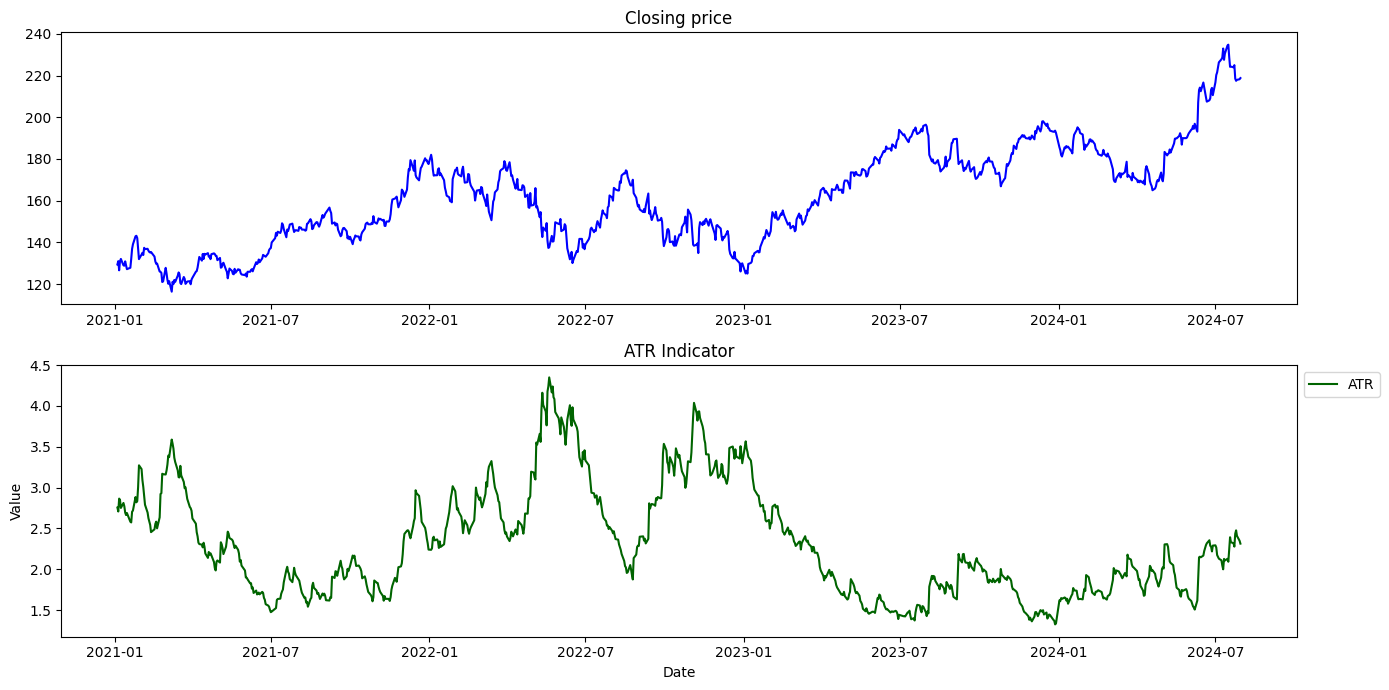

In [15]:
technical_indicator.plot_ATR(AAPL_recent)

**Observation**
- ATR does not indicate the direction of price movement but instead focuses on the degree of price fluctuation.
- During news sentiment analysis this can be used to determine which news caused volatility in the market.

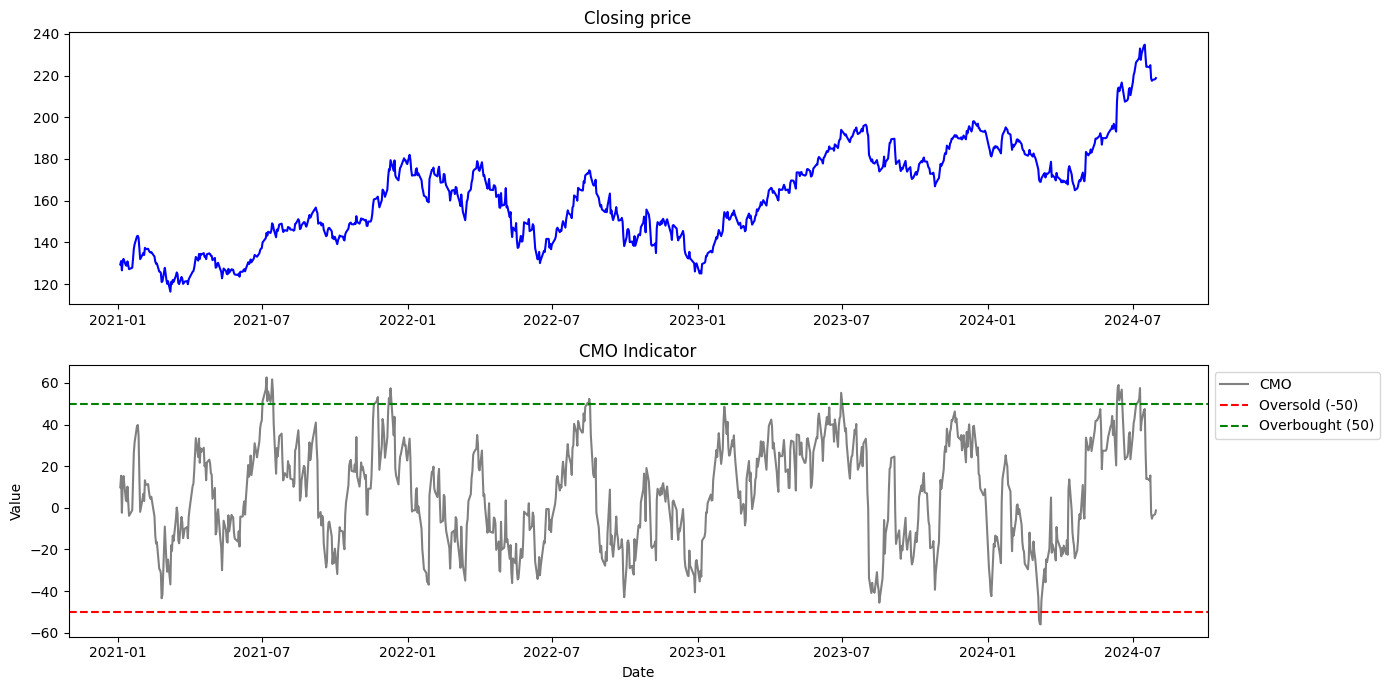

In [16]:
technical_indicator.plot_CMO(AAPL_recent)

 - CMO values above +50 indicate overbought conditions, and values below -50 indicate oversold conditions.

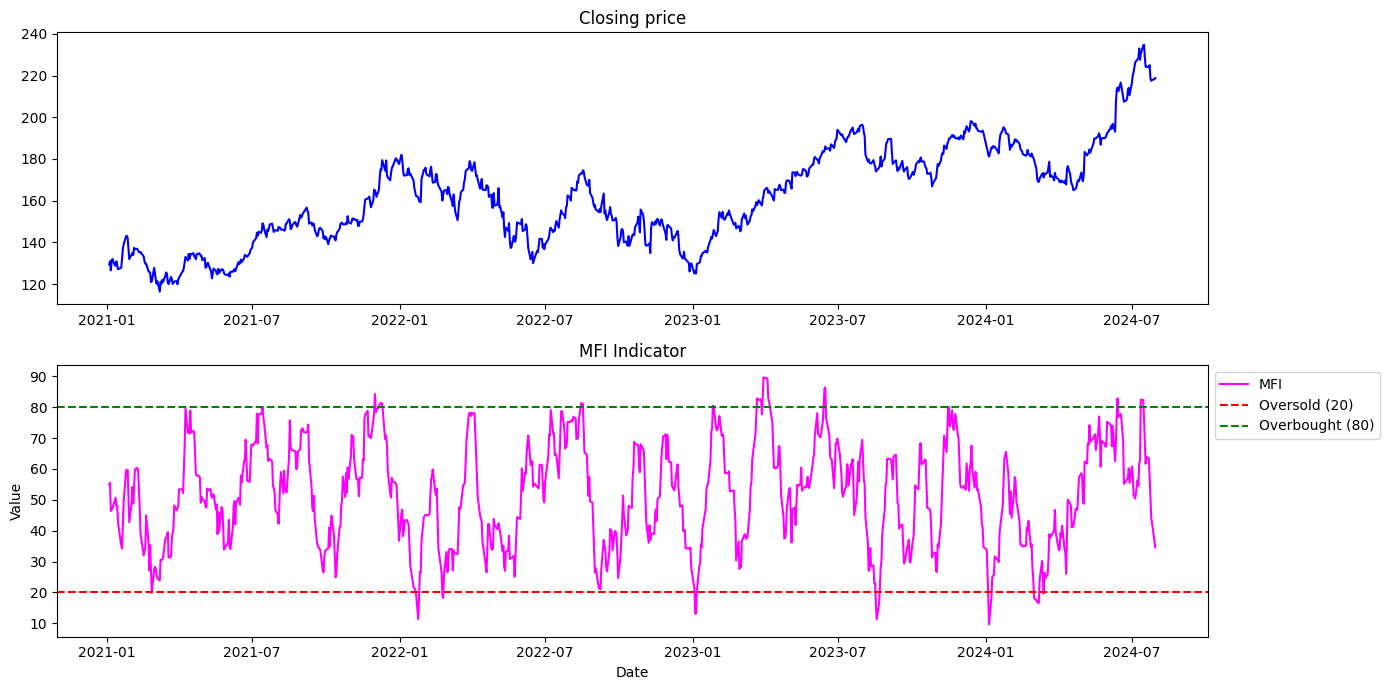

In [17]:
technical_indicator.plot_MFI(AAPL_recent)

**Observation**
- MFI is also known as volume-weighted RSI
- MFI > 80: The asset is considered overbought, indicating it might be due for a price correction or pullback.
- MFI < 20: The asset is considered oversold, indicating it might be due for a price increase or reversal.

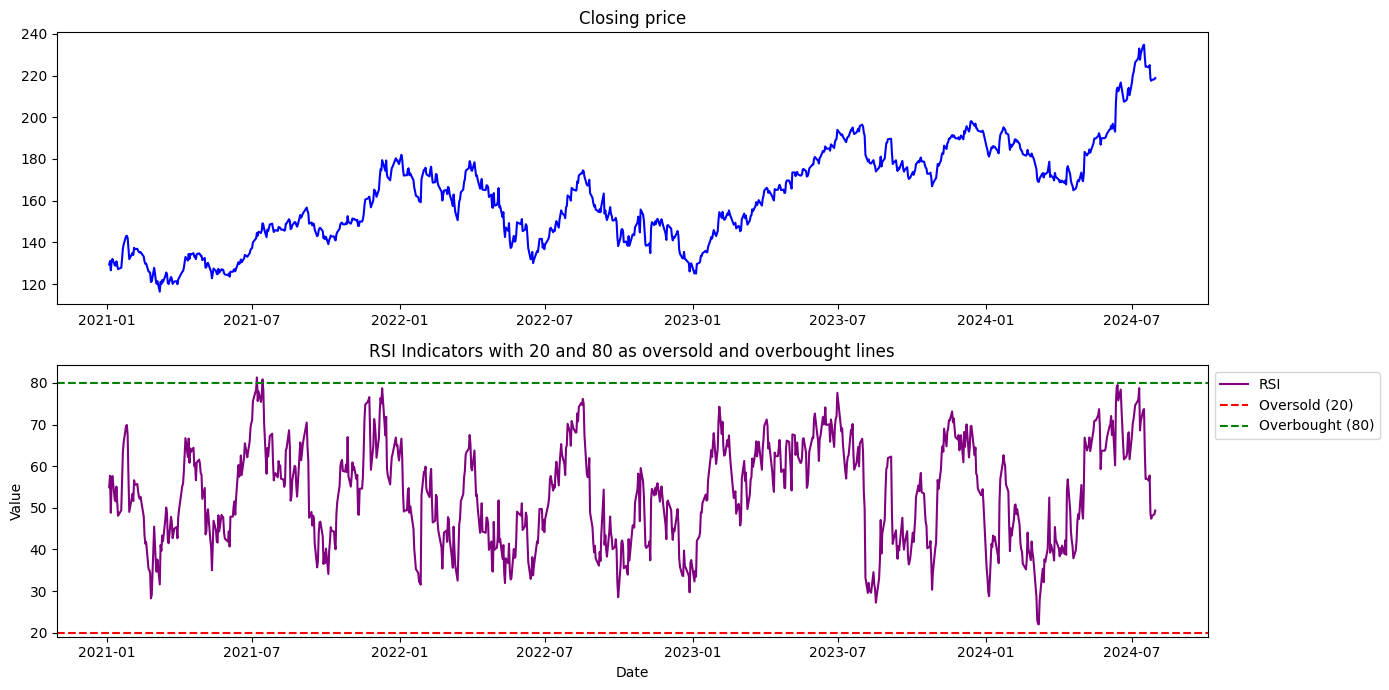

In [18]:
technical_indicator.plot_RSI(AAPL_recent)

**Observation**
- Lagging indicator used to comform trend
- RSI > 80: The asset is considered overbought, indicating it might be due for a price correction or pullback.
- RSI < 20: The asset is considered oversold, indicating it might be due for a price increase or reversal.

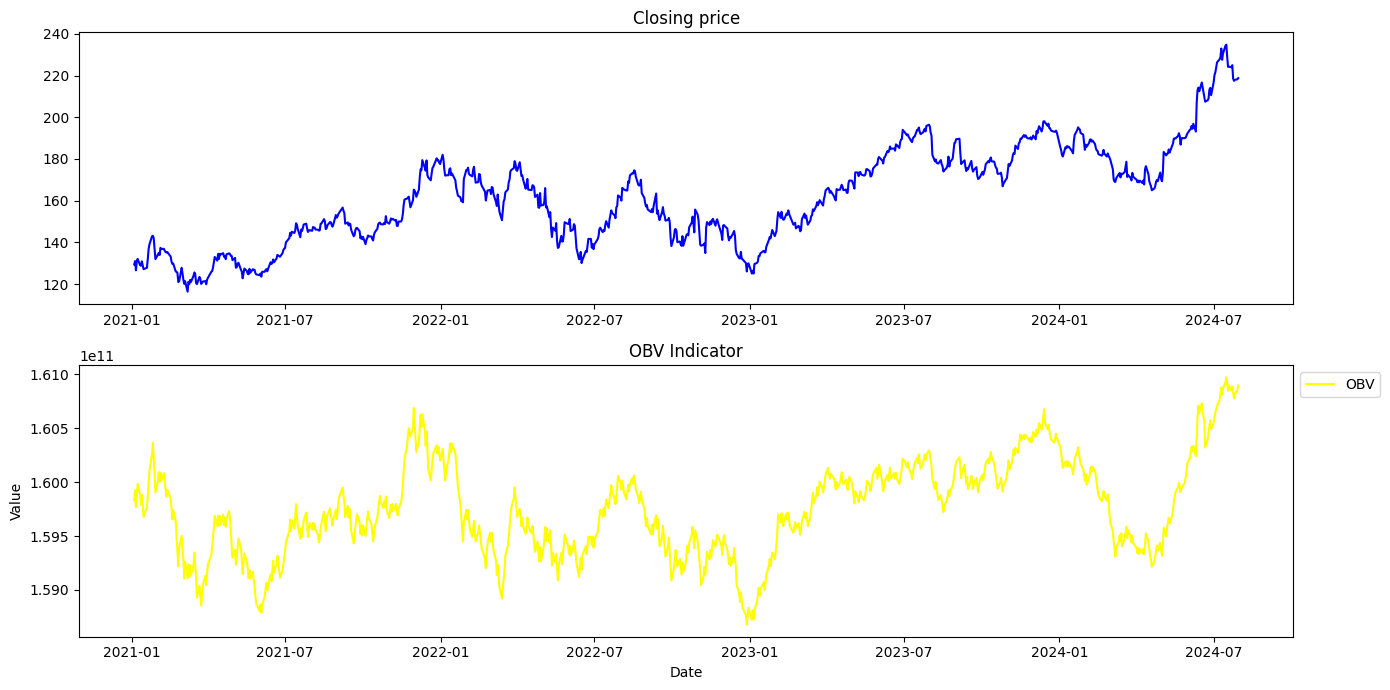

In [19]:
technical_indicator.plot_OBV(AAPL_recent)

**Observation**
- OBV can be used for trend conformation as we can see the price movement is almost similar to the OBV